# Problem Statement

#### Using the attached file, Build a neural network model to achieve the best possible classification accuracy for sentiments( Neutral, Positive, Negative), find out what factors are influencing the sentiment, and build a model to identify the topics being discussed.

## Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets_df = pd.read_csv('sentiment.csv')
print(tweets_df.head())

   id                                               text sentiment
0   1  RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1   2  RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2   3  RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3   4  RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4   5  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 3 columns):
id           13871 non-null int64
text         13871 non-null object
sentiment    13871 non-null object
dtypes: int64(1), object(2)
memory usage: 325.2+ KB


In [4]:
tweets_df = tweets_df.drop(['id'], axis=1)

## Explore the Dataset

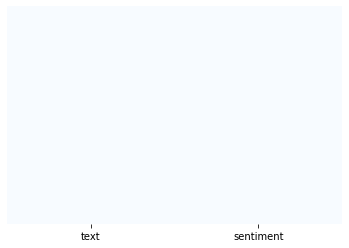

In [5]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#Checking for unknowns

In [7]:
tweets_df['length'] = tweets_df['text'].apply(len)
#Checking the lengths of the tweets

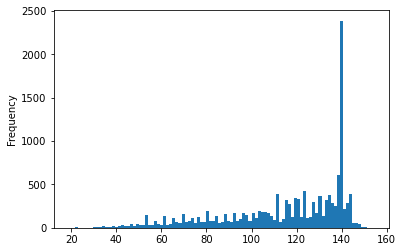

In [8]:
tweets_df['length'].plot(bins=100, kind='hist')

In [9]:
tweets_df.describe()

,length
count,13871.000000
mean,114.668589
std,27.609113
min,19.000000
25%,98.000000
50%,123.000000
75%,139.000000
max,154.000000


In [11]:
tweets_df[tweets_df['length'] == 21]['text'].iloc[0]
#Shortest message

'#GOPDebate was a joke'

In [24]:
tweets_df[tweets_df['length'] == 152]['text'].iloc[0]
#Longest message

'#GOPDebate\r\nMegyn Kelly:A+\r\nRubio:A\r\nFiorina:A\r\nChristie:A-\r\nBush:B+\r\nPerry:B+\r\nKasich:B\r\nWalker:B\r\nCruz:C\r\nCarson:C\r\nJindal:C\r\nPaul:D-\r\nTrump:F\r\nRest:😴'

In [29]:
positive = tweets_df[tweets_df['sentiment']== 'Positive']

In [30]:
positive

,text,sentiment,length
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,140
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,140
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,140
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive,135
11,RT @WayneDupreeShow: Just woke up to tweet thi...,Positive,133
...,...,...,...
13859,"Best line of #GOPDebate was ""Immigration witho...",Positive,96
13862,"RT @RWSurferGirl: Trump has got it right, nobo...",Positive,130
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive,143
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive,111


In [32]:
negative = tweets_df[tweets_df['sentiment']== 'Negative']

In [33]:
negative

,text,sentiment,length
6,RT @warriorwoman91: I liked her and was happy ...,Negative,140
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative,134
9,RT @NancyOsborne180: Last night's debate prove...,Negative,120
10,@JGreenDC @realDonaldTrump In all fairness #Bi...,Negative,83
12,Me reading my family's comments about how grea...,Negative,89
...,...,...,...
13863,So trans soldiers can die for you Huckabee but...,Negative,130
13864,RT @RWSurferGirl: Is it just me or does anyone...,Negative,119
13865,RT @RWSurferGirl: Fox is cherry picking the ca...,Negative,116
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative,135


In [34]:
neutral = tweets_df[tweets_df['sentiment']== 'Neutral']

In [35]:
neutral

,text,sentiment,length
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,106
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,84
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral,69
13,"RT @ArcticFox2016: RT @AllenWestRepub ""Dear @J...",Neutral,100
23,RT @thekevinryder: #GOPDebate (Vine by @dabull...,Neutral,77
...,...,...,...
13827,I wonder which candidate is going to be the fi...,Neutral,104
13829,RT @ericstonestreet: Trump has Cam hands. #GOP...,Neutral,53
13836,Common Core was developed by the states with i...,Neutral,116
13842,Trump and most of the World! Just look at the ...,Neutral,126


## Look at words in a Wordcloud

In [36]:
sentences = tweets_df['text'].tolist()

In [37]:
sentences_as_one_string = " ".join(sentences)

     |████████████████████████████████| 220 kB 2.0 MB/s eta 0:00:01
  Created wheel for WordCloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158012 sha256=dc74dfdf0e00f8452e4ead0c82c68d5723495e9cbf3324a4c1e8dfe20c1c6b42
  Stored in directory: /Users/savannahmichel/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built WordCloud


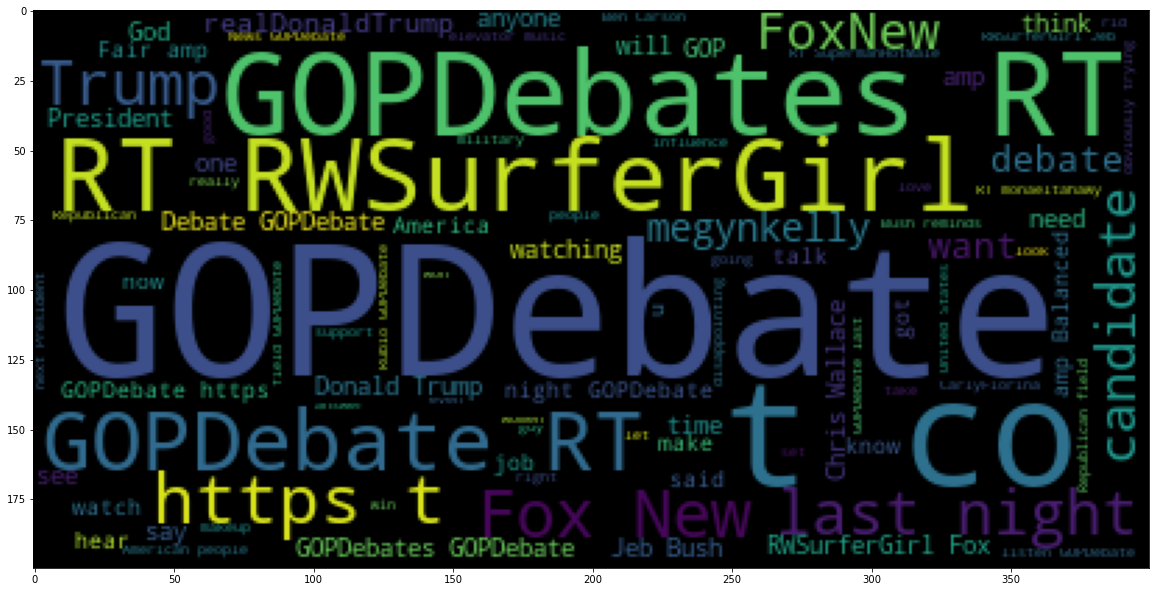

In [38]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


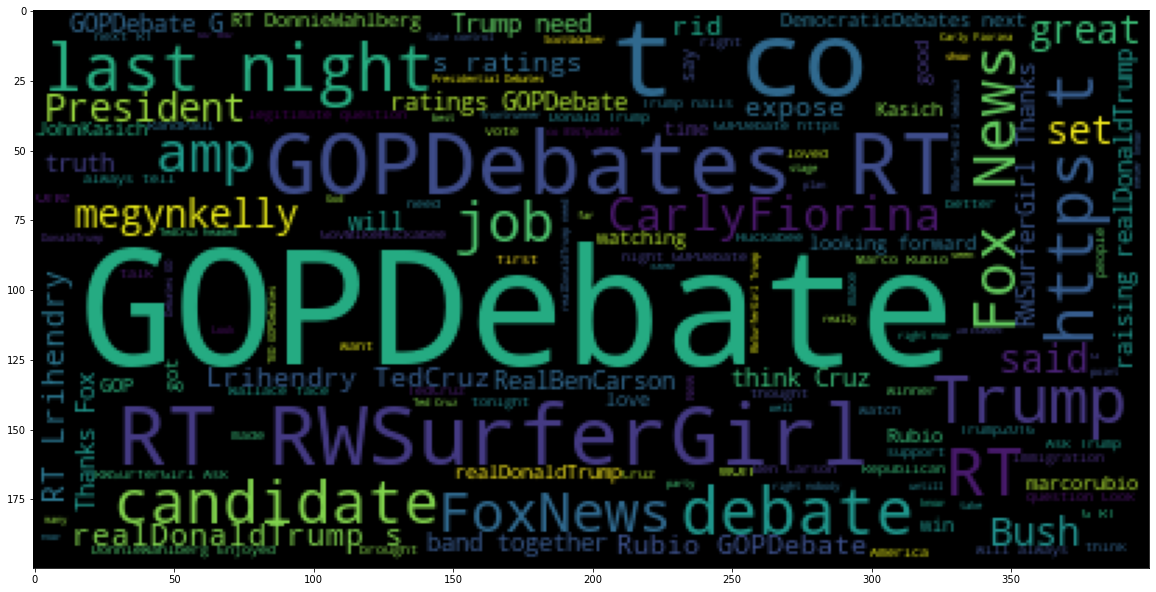

In [71]:
positive_list = positive['text'].tolist()
sentences_as_one_string = " ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

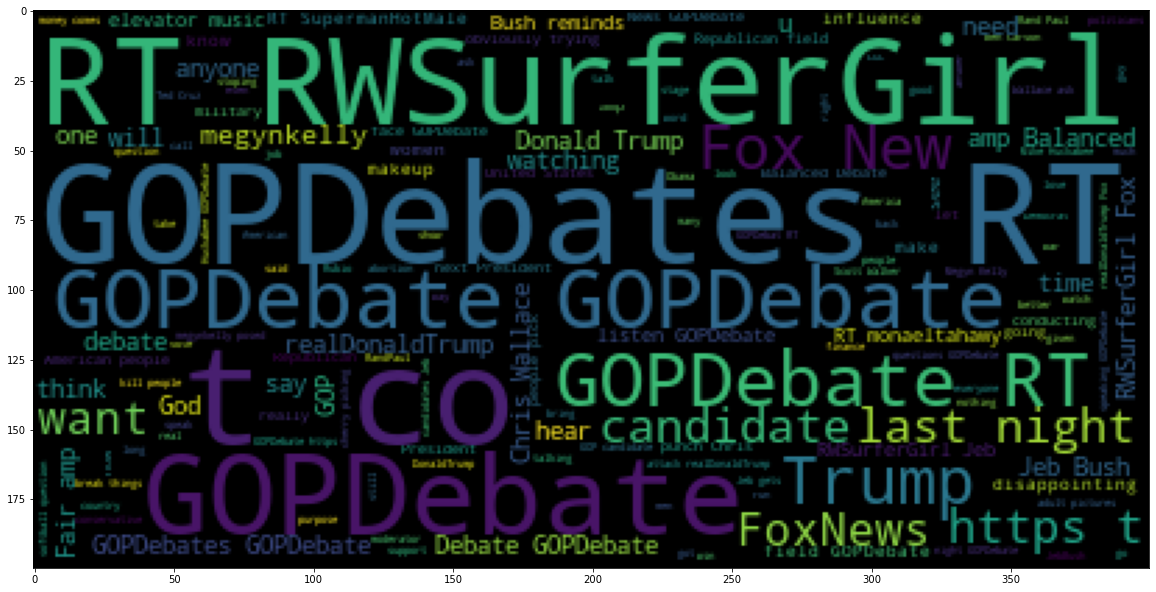

In [39]:
negative_list = negative['text'].tolist()
sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

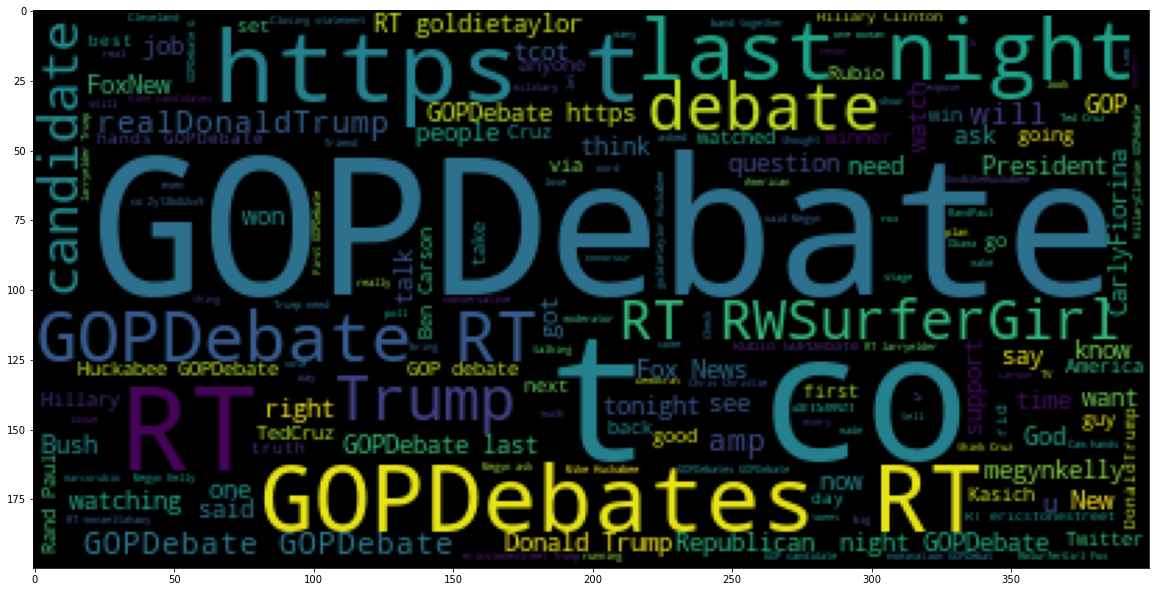

In [72]:
neutral_list = neutral['text'].tolist()
sentences_as_one_string = " ".join(neutral_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Preform data cleaning 

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/savannahmichel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [50]:
tweets_df_clean = tweets_df['text'].apply(message_cleaning)

In [51]:
print(tweets_df_clean[5]) # show the cleaned up version

['RT', 'GregAbbottTX', 'TedCruz', 'first', 'day', 'rescind', 'every', 'illegal', 'executive', 'action', 'taken', 'Barack', 'Obama', 'GOPDebate', 'FoxNews']


In [53]:
print(tweets_df['text'][5]) # show the original version

RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning,  dtype = 'uint8').fit_transform(tweets_df['text']).toarray()

In [56]:
tweets_countvectorizer.shape

(13871, 23141)

In [57]:
tweets = pd.DataFrame(tweets_countvectorizer)

In [58]:
X = tweets

In [59]:
X

,0,1,2,3,4,5,6,7,8,9,...,23131,23132,23133,23134,23135,23136,23137,23138,23139,23140
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = tweets_df['sentiment']

## Train a Naive Bayes Classifier Model

In [61]:
X.shape

(13871, 23141)

In [62]:
y.shape

(13871,)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## Assess trained model preformance

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

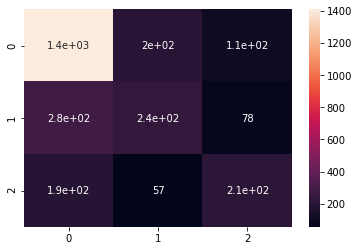

In [66]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [67]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    Negative       0.75      0.82      0.78      1716
     Neutral       0.48      0.40      0.43       600
    Positive       0.53      0.46      0.49       459

    accuracy                           0.67      2775
   macro avg       0.59      0.56      0.57      2775
weighted avg       0.65      0.67      0.66      2775

